<a href="https://colab.research.google.com/github/MadChapa/Deep_Learning/blob/main/Churn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Artificial Neural Network


# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Churn_Modelling.csv')
dataset.head()
X = dataset.iloc[:, 3:13]
print(X)
y = dataset.iloc[:, 13]
print(y)


      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
0           

In [ ]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
print(geography)

gender=pd.get_dummies(X['Gender'],drop_first=True)
print(gender)

      Germany  Spain
0           0      0
1           0      1
2           0      0
3           0      0
4           0      1
...       ...    ...
9995        0      0
9996        0      0
9997        0      0
9998        1      0
9999        0      0

[10000 rows x 2 columns]
      Male
0        0
1        0
2        0
3        0
4        0
...    ...
9995     1
9996     1
9997     0
9998     1
9999     0

[10000 rows x 1 columns]


In [ ]:

## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)


In [ ]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
7389,667,34,5,0.00,2,1,0,163830.64,0,1,0
9275,427,42,1,75681.52,1,1,1,57098.00,1,0,1
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,0,1,1
356,850,57,8,126776.30,2,1,1,132298.49,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,1,0,0
4859,794,22,4,114440.24,1,1,1,107753.07,0,1,0
3264,738,35,5,161274.05,2,1,0,181429.87,0,0,1
9845,590,38,9,0.00,2,1,1,148750.16,0,1,0


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train

X_test = sc.transform(X_test)
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


In [ ]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10, kernel_initializer= 'he_normal',activation='relu',input_dim = 11))
classifier.add(Dropout(0.3))

# Adding the second hidden layer
classifier.add(Dense(units = 20, kernel_initializer= 'he_normal',activation='relu'))
classifier.add(Dropout(0.4))


#Adding the third hidden layer
classifier.add(Dense(units = 15, kernel_initializer= 'he_normal',activation='relu'))
classifier.add(Dropout(0.2))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid'))

classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 15)                315       
                                                                 
 dropout_2 (Dropout)         (None, 15)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [ ]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



In [ ]:


# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs= 100)


Epoch 1/100
536/536 [==============================] - 3s 3ms/step - loss: 0.5811 - accuracy: 0.7727 - val_loss: 0.5090 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5156 - accuracy: 0.7947 - val_loss: 0.4954 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5034 - accuracy: 0.7957 - val_loss: 0.4835 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4875 - accuracy: 0.7962 - val_loss: 0.4667 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4749 - accuracy: 0.7962 - val_loss: 0.4639 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4715 - accuracy: 0.7962 - val_loss: 0.4590 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4584 - accuracy: 0.7962 - val_loss: 0.4512 - val_accuracy: 0.7955

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


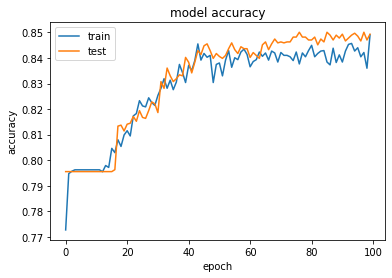

In [ ]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

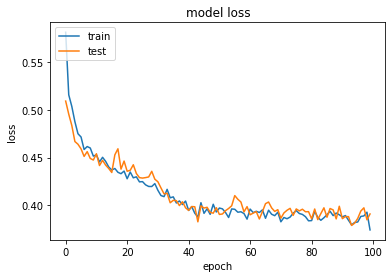

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)


[[1539   56]
 [ 213  192]]


In [ ]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score


0.8655